In [170]:
from gurobipy import *
import numpy as np
import pandas as pd

In [171]:
#Import Data from csv, and created matrix
requirements = np.genfromtxt('Pb1_requirements.csv',delimiter=',')
availability = np.genfromtxt('Pb1_availability.csv',delimiter=',')
demand = np.genfromtxt('Pb1_demand.csv',delimiter=',')
unitprofit = np.genfromtxt('Pb1_unitprofit.csv',delimiter=',')
holdingcost = np.genfromtxt('Pb1_holdingcost.csv',delimiter=',')

In [172]:
print(requirements.shape, 
      availability.shape, 
      demand.shape,
      unitprofit.shape,
      holdingcost.shape)

(100, 10) (10, 52) (100, 52) (100,) (52,)


In [173]:
products = range(len(unitprofit)) # 100
weeks = range(len(holdingcost))# 52
material = range(len(availability))

In [174]:
c = np.tile(holdingcost,(100,1))

c.shape

(100, 52)

In [175]:

pi = np.tile(unitprofit, (52, 1))
pi = np.transpose(pi)
pi

array([[ 55.91 ,  55.91 ,  55.91 , ...,  55.91 ,  55.91 ,  55.91 ],
       [ 49.956,  49.956,  49.956, ...,  49.956,  49.956,  49.956],
       [ 68.056,  68.056,  68.056, ...,  68.056,  68.056,  68.056],
       ...,
       [ 53.754,  53.754,  53.754, ...,  53.754,  53.754,  53.754],
       [116.86 , 116.86 , 116.86 , ..., 116.86 , 116.86 , 116.86 ],
       [ 63.867,  63.867,  63.867, ...,  63.867,  63.867,  63.867]])

In [176]:
m = Model()
x = m.addVars(products,weeks)
y = m.addVars(products,weeks)
I = m.addVars(products,weeks)

In [177]:
m.setObjective(sum(sum(pi[i,j] * y[i,j] for i in products)for j in weeks) - 
              sum(sum(c[i,j] * I[i,j] for i in products)for j in weeks))
m.modelSense = GRB.MAXIMIZE

In [178]:
#ST1.production, sales, and inventory must be greater or equal to 0. 
for i in products:
    for j in weeks:
        m.addConstr(x[i,j] >= 0.0)
        m.addConstr(y[i,j] >= 0.0)
        m.addConstr(I[i,j] >= 0.0)



In [193]:
#ST2. No more when material are used than available
for j in weeks:
    for k in material:
        m.addConstr(sum(requirements[i,k]*x[i,j] for i in products) <= availability[k,j])
    #expr = LinExpr(sum(requirements[i,k] * x[i,j] for k in material))
    #m.addConstr(expr <= availability[k,j])

In [181]:
#ST.3. Sales <= deamdn 
for i in products:
    for j in weeks: 
        m.addConstr(y[i,j] <= demand[i,j])

In [191]:
#4. First day inventory should be zero 
for i in products:
    for j in weeks: 
        if j == 0:
            m.addConstr(I[i,j] == 0)
        else: 
            m.addConstr(I[i,j] == I[i, j-1] + x[i,j] - y[i,j])

In [194]:
m.optimize()

# Print optimal cost
print(m.objVal)

# Print optimal solution
    
for i in products:
    for j in weeks:
        print(x[i,j].x)

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 37074 rows, 15600 columns and 102514 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [7e-02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 7e+04]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1447976e+08   2.394420e+07   0.000000e+00      0s
   26293    3.8684441e+07   1.811799e+07   0.000000e+00      5s
   32795    3.7493406e+07   0.000000e+00   0.000000e+00      6s

Solved in 32795 iterations and 6.39 seconds
Optimal objective  3.749340615e+07
37493406.14702164
0.0
59.71820976799526
0.0
291.19
50.607757849076954
145.08028951375695
46.40662598601158
10.349105419326378
306.87
171.783974456305
209.3911885402407
227.61
324.81
249.69
276.29
228.65944786963712
166.95788299455555
160.46140278182392
157.78111233186812
0.0
0.0
0.0
52.626868268553764
22

276.24
256.77
265.04
368.72
248.16
301.7
332.68
212.69
178.27
343.88
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
305.32
331.23
302.74
368.69
425.75638895229724
230.09361104770275
218.33
433.9036447401766
383.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
310.16481431148276
372.6551856885172
358.76708893494384
372.7222736673631
287.5231859994436
293.14745139824925
458.1552346973433
114.67290350873085
368.9794686122241
139.10239318170179
460.0200853377726
128.773548287

In [207]:
pi[1]

array([49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956,
       49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956,
       49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956,
       49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956,
       49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956,
       49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956, 49.956,
       49.956, 49.956, 49.956, 49.956])

In [213]:
sales = m.getAttr('X', x.values())

In [214]:
def slice_per(source, step):
    return [source[i::step] for i in range(step)]

In [217]:
total_sale = slice_per(sales, 100)
total_sale = np.array(total_sale)
total_sale.shape

(100, 52)

In [220]:
total_profit = np.inner(total_sale, pi)
np.sum(total_profit)

2260456502.084103

In [223]:
inventory = m.getAttr('X', I.values())
total_inventory = slice_per(inventory, 100)
total_inventory = np.array(total_sale)
total_inventory.shape

(100, 52)

In [226]:
total_inventory = np.inner(total_inventory, c)
np.sum(total_inventory)

141496901.71036658

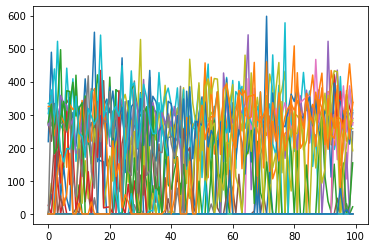

In [234]:
import numpy as np
from matplotlib import pyplot as plt


plt.plot(total_sale)
#
plt.show()

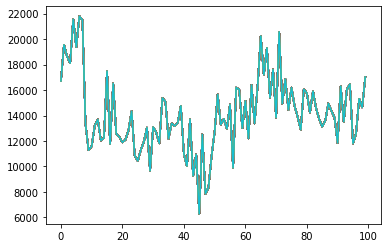

In [235]:
plt.plot(total_inventory)
#
plt.show()

In [200]:
total = 0
for i in products:
    if y[i,30].x == x[i,30].x:
        total += 1
        
        
total

92

In [201]:
total = 0
for i in products:
    if y[i,30].x == demand[i,30]:
        total += 1
        
        
total

21